## bibliotecas

In [783]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

## importaçao de tabelas

In [671]:
bd = pd.read_csv("train.csv")
bdTest = pd.read_csv('test.csv')

In [672]:
display(bd)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### ver dados nulos, relaçao entre dados e dados desnecessarios

In [673]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [674]:
bd.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### mostra que teve pessoa nao pagou para estar no navio

In [675]:
bdTest.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [676]:
bdTest.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [677]:
bd.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### juntar DataFrames para alterar os dados apenas 1 vez

In [678]:
# salvar o ID pois o desafio pede e eu irei deletar ela por hora para nao atrapalhar na analise e na treinamento
idPassageiro = bdTest.PassengerId

In [679]:
titanicDf = pd.concat([bd, bdTest], ignore_index=True)

In [680]:
# onde acaba meu treino
bdIndex = len(bd)
print(bdIndex)

891


In [681]:
testeINdex = len(titanicDf) - len(bdTest)
print(testeINdex)

891


In [682]:
display(titanicDf)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


#### 1309 linhas ao todo

In [683]:
titanicDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [684]:
# 4 colunas com dados faltantes
titanicDf.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [685]:
titanicDf.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


#### criar novo DataFrame onde so sera colocado as colunas ja analisadas

In [686]:
df = pd.DataFrame()

In [687]:
titanicDf["Survived"].nunique()

2

In [688]:
titanicDf["Survived"].unique()

array([ 0.,  1., nan])

#### posivel ver que a maioria morreu

In [689]:
titanicDf.Survived.value_counts()

Survived
0.0    549
1.0    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

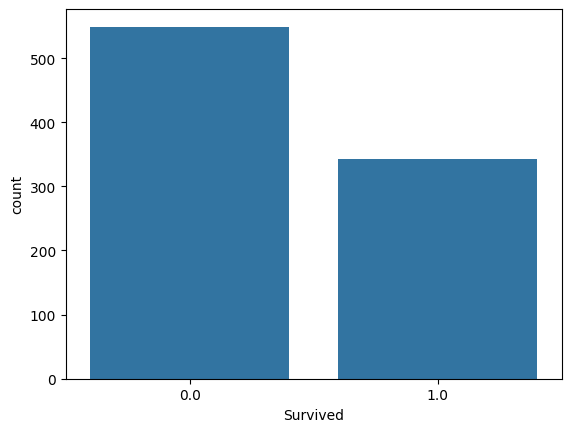

In [690]:
sns.countplot(data=titanicDf, x = 'Survived')

#### função para analisar um coluna especifica passada coluna

Quantidade de valores únicos: 2

Quais são os valores únicos: [ 0.  1. nan]

Quantidade de valores nulos: 418

Quantidade por opção: 
Survived
0.0    549
1.0    342
Name: count, dtype: int64


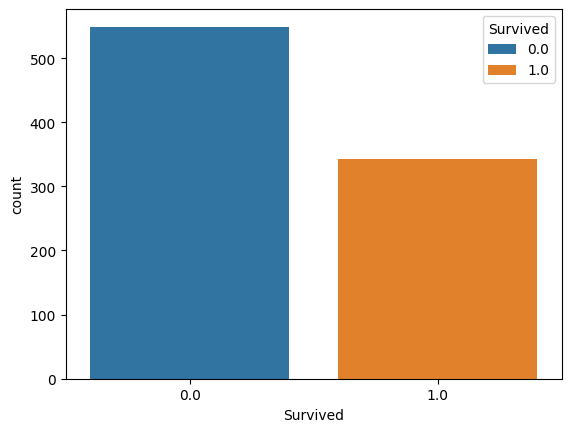

In [691]:
# função para facilitar a vida na hora de analisar cada coluna
def titanic_func(data, column, count = True):
    print(f'Quantidade de valores únicos: {data[column].nunique()}')
    print(f'\nQuais são os valores únicos: {data[column].unique()}')
    print(f'\nQuantidade de valores nulos: {data[column].isnull().sum()}')
    print (f'\nQuantidade por opção: \n{data[column].value_counts()}')
    if count == True:
        sns.countplot(data = data, x = column, hue ='Survived')
    else:
        sns.displot(data[column], kde = True)

titanic_func(titanicDf, 'Survived' )

In [692]:
df["Survived"] = titanicDf.Survived

#### analise da coluna Pclass (Classe)

Quantidade de valores únicos: 3

Quais são os valores únicos: [3 1 2]

Quantidade de valores nulos: 0

Quantidade por opção: 
Pclass
3    709
1    323
2    277
Name: count, dtype: int64


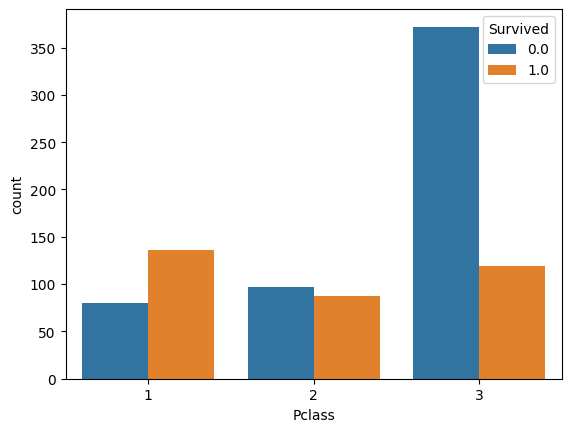

In [693]:
titanic_func(titanicDf, 'Pclass')

# sem valores nulos
#a maioria estava na 3° classe

#### a maioria estava na 3° classe
#### sairam mais pessoas vivas da 1° classe 

### apos a analise, e correção de dados colocar a coluna limpa no df

In [694]:
df["Pclass"] = titanicDf.Pclass

#### analise coluna Sexo

Quantidade de valores únicos: 2

Quais são os valores únicos: ['male' 'female']

Quantidade de valores nulos: 0

Quantidade por opção: 
Sex
male      843
female    466
Name: count, dtype: int64


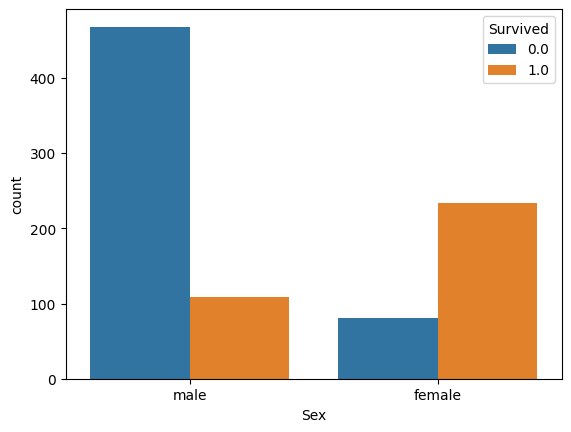

In [695]:
titanic_func(titanicDf, 'Sex')

#### homens morreram muito mas que as mulheres

### transformar dados do tipo obj em int, para poder trabalhar corretamente e fazer aprendizagem de maquina

In [696]:
titanicDf.Sex = titanicDf['Sex'].map({'male': 1, 'female': 0})

In [697]:
df["Sex"] = titanicDf.Sex

In [698]:
df

,Survived,Pclass,Sex
0,0.0,3,1
1,1.0,1,0
2,1.0,3,0
3,1.0,1,0
4,0.0,3,1
...,...,...,...
1304,NaN,3,1
1305,NaN,1,0
1306,NaN,3,1
1307,NaN,3,1


### analise coluna idade

Quantidade de valores únicos: 98

Quais são os valores únicos: [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.   22.5  18.5  67.   76.   26.5  60.5  11.5
  0.33  0.17 38.5 ]

Quantidade de valores nulos: 263

Quantidade por opção: 
Age
24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
        ..
23.5     1
70.5     1
55.5     1
20.5     1
38.5     1
Name: count, Length: 98, dtype: int64


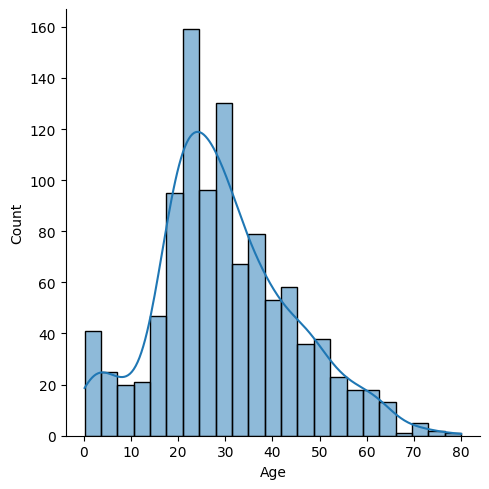

In [699]:
titanic_func(titanicDf, 'Age' , False)

#### muitos valores vazios

#### a maioria das pessoas tinha cercad de 23 anos

In [700]:
# tirar colunas nao numericas sem muita relaçao
coef = titanicDf.drop(["Name", "Ticket" , "Cabin" , "Embarked"], axis=1)

In [701]:
coef.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.013406,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,0.124617,-0.408106,0.060832,0.018322,-0.558629
Sex,0.013406,-0.543351,0.124617,1.000000,0.063645,-0.109609,-0.213125,-0.185523
Age,0.028814,-0.077221,-0.408106,0.063645,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.109609,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.213125,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,-0.185523,0.178740,0.160238,0.221539,1.000000


### pegar a media das idades por meio da media da idade das pessoas de cada classe

In [702]:
titanicDf[titanicDf['Pclass'] == 1 ]['Age'].mean()

39.15992957746479

In [703]:
titanicDf[titanicDf['Pclass'] == 2 ]['Age'].mean()

29.506704980842912

In [704]:
titanicDf[titanicDf['Pclass'] == 3 ]['Age'].mean()

24.81636726546906

In [705]:
titanicDf.Age.mean()

29.881137667304014

##### cada nome tem um titulo (corr. , dr. , ...) minha ideia e pegar esse titulo de nobreza para pegar a mdia de idades de cada titulo

In [706]:
nomes = [] 
for nome in titanicDf['Name']:
    nome = nome.split(' ')
    nomes.append(nome[1])

In [707]:
dataNomes = pd.DataFrame(nomes)

In [708]:
dataNomes = dataNomes.rename(columns={dataNomes.columns[0]: 'Nomes'})

In [709]:
dataNomes["Nomes"].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Planke,', 'Don.', 'Rev.',
       'Billiard,', 'der', 'Walle,', 'Dr.', 'Pelsmaeker,', 'Mulder,', 'y',
       'Steen,', 'Carlo,', 'Mme.', 'Impe,', 'Ms.', 'Major.', 'Gordon,',
       'Messemaeker,', 'Mlle.', 'Col.', 'Capt.', 'Velde,', 'the',
       'Shawah,', 'Jonkheer.', 'Melkebeke,', 'Cruyssen,', 'Khalil,',
       'Palmquist,', 'Brito,'], dtype=object)

In [710]:
len(nomes)

1309

In [711]:
titanicDf['SobreNomes'] = nomes

In [712]:
titanicDf.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SobreNomes
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.


In [713]:
for i in sorted(titanicDf['SobreNomes'].unique()):
    print(f"Pessoas com o nome {i} tem a media de idade de: {titanicDf[titanicDf['SobreNomes'] == i ]['Age'].mean() :.2f}")

Pessoas com o nome Billiard, tem a media de idade de: 26.00
Pessoas com o nome Brito, tem a media de idade de: 32.00
Pessoas com o nome Capt. tem a media de idade de: 70.00
Pessoas com o nome Carlo, tem a media de idade de: 26.50
Pessoas com o nome Col. tem a media de idade de: 54.00
Pessoas com o nome Cruyssen, tem a media de idade de: 47.00
Pessoas com o nome Don. tem a media de idade de: 40.00
Pessoas com o nome Dr. tem a media de idade de: 43.57
Pessoas com o nome Gordon, tem a media de idade de: 48.50
Pessoas com o nome Impe, tem a media de idade de: 25.33
Pessoas com o nome Jonkheer. tem a media de idade de: 38.00
Pessoas com o nome Khalil, tem a media de idade de: 45.00
Pessoas com o nome Major. tem a media de idade de: 48.50
Pessoas com o nome Master. tem a media de idade de: 5.37
Pessoas com o nome Melkebeke, tem a media de idade de: nan
Pessoas com o nome Messemaeker, tem a media de idade de: 36.25
Pessoas com o nome Miss. tem a media de idade de: 21.78
Pessoas com o nome Mll

In [714]:
titanicDf['Age'].isnull().sum()

263

#### trocar os valores nulos por aquela media de idades por titulo

In [715]:
for nome in sorted(titanicDf['SobreNomes'].unique()):
    for i in titanicDf.index:
        if pd.isnull(titanicDf['Age'][i]):
            if titanicDf['SobreNomes'][1] == nome:
                titanicDf['Age'][i] = round(titanicDf[titanicDf['SobreNomes'] == nome ]['Age'].mean())
        else:
            continue    

C:\Users\Vitor\AppData\Local\Temp\ipykernel_1180\2724585034.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  titanicDf['Age'][i] = round(titanicDf[titanicDf['SobreNomes'] == nome ]['Age'].mean())
C:\Users\Vitor\AppData\Local\Temp\ipykerne

In [716]:
titanicDf.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
SobreNomes        0
dtype: int64

In [717]:
df['Age'] = titanicDf['Age']

#### analise da coluna SibSp (irmaos a bordo)

Quantidade de valores únicos: 7

Quais são os valores únicos: [1 0 3 4 2 5 8]

Quantidade de valores nulos: 0

Quantidade por opção: 
SibSp
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64


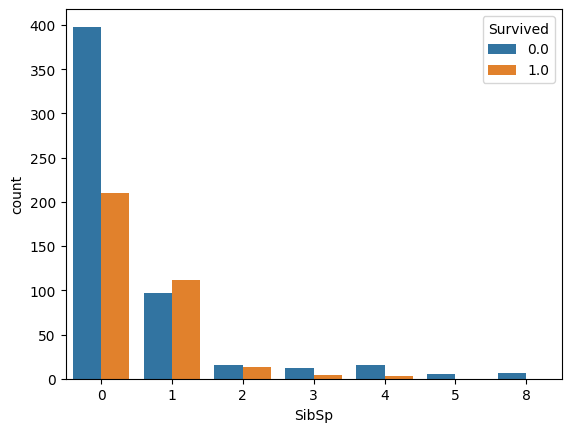

In [718]:
titanic_func(titanicDf , 'SibSp')

In [719]:
df['SibSp'] = titanicDf['SibSp']

#### analise coluna Parch(pais/filhos)

Quantidade de valores únicos: 8

Quais são os valores únicos: [0 1 2 5 3 4 6 9]

Quantidade de valores nulos: 0

Quantidade por opção: 
Parch
0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: count, dtype: int64


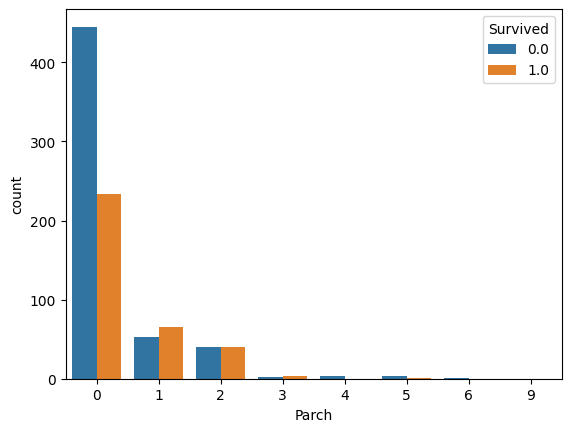

In [720]:
titanic_func(titanicDf , 'Parch')

In [721]:
df['Parch'] = titanicDf['Parch']

#### criação da coluna "FamilySize" que junta se a pessoa tem irmao e filho a bordo

In [722]:
titanicDf['FamilySize'] = titanicDf['SibSp'] + titanicDf['Parch'] + 1
display(titanicDf)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SobreNomes,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,2
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs.,2
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr.,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",1,37.0,0,0,A.5. 3236,8.0500,NaN,S,Mr.,1
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,C,y,1
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr.,1
1307,1308,NaN,3,"Ware, Mr. Frederick",1,37.0,0,0,359309,8.0500,NaN,S,Mr.,1


In [723]:
df['FamilySize'] = titanicDf['FamilySize']

Quantidade de valores únicos: 9

Quais são os valores únicos: [ 2  1  5  3  7  6  4  8 11]

Quantidade de valores nulos: 0

Quantidade por opção: 
FamilySize
1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: count, dtype: int64


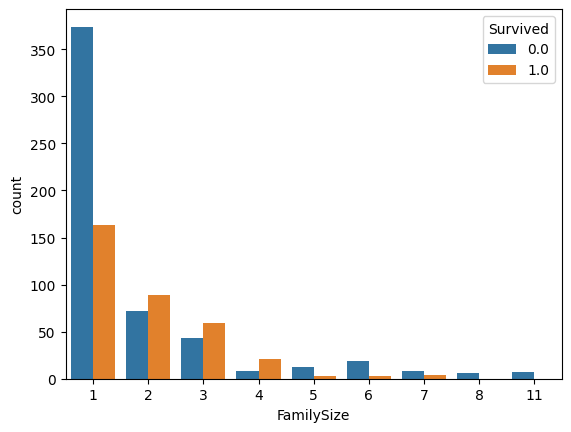

In [724]:
titanic_func(titanicDf , 'FamilySize')

#### analise da coluna tarifa

Quantidade de valores únicos: 281

Quais são os valores únicos: [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.8     76.7292  61.9792  27.75    46.9     80.      83.475
  27.9     15.2458   8.1583   8.6625  73.5     14.4542  56.4958   7.65
  29.      12.475    9.       9.5      7.7875  47.1     15.85    34.375
  61.175   20.575   34.6542  63.3583  23.      77.2875   8.6542   7.775
  24.15     9.825   14.4583 247.5208   7.1417  22.3583   6.975    7.05
  14.5     15.0458  26.2833   9.2167  79.2      6.75    11.5     36.75
   7.7958  12.525   66.6      7.3125  61.3792   7.7333  69.55    16.1
  15.75    20.525   55.      25.925   33.5     30.6958  25.4667  28.7125
   0.      1

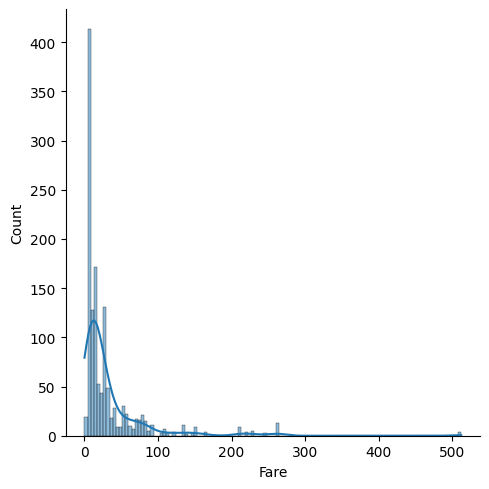

In [725]:
titanic_func(titanicDf , 'Fare' , False)

#### somente 1 valor nulo, que foi preenchido pela media da tarifa da classe que a pessoa estava(3°)

In [726]:
titanicDf['Fare'].fillna(titanicDf[titanicDf['Pclass'] == 3 ]['Fare'].mean(),  inplace=True)

C:\Users\Vitor\AppData\Local\Temp\ipykernel_1180\1866233766.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanicDf['Fare'].fillna(titanicDf[titanicDf['Pclass'] == 3 ]['Fare'].mean(),  inplace=True)


In [727]:
titanicDf.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
SobreNomes        0
FamilySize        0
dtype: int64

In [728]:
df['Fare'] = titanicDf['Fare']

### analise da coluna Embarked (pono de embarque, qual pais talvez)

Quantidade de valores únicos: 3

Quais são os valores únicos: ['S' 'C' 'Q' nan]

Quantidade de valores nulos: 2

Quantidade por opção: 
Embarked
S    914
C    270
Q    123
Name: count, dtype: int64


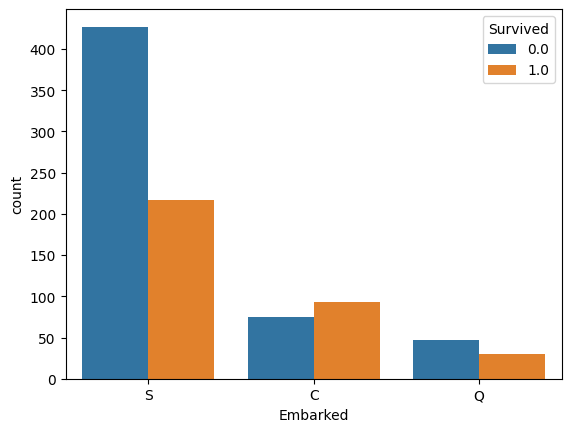

In [729]:
titanic_func(titanicDf , 'Embarked')

##### algumas analises que mostra, quem estava no embarque "C", tinha uma condição financeira maior e teve mais chance de nao morrer

In [730]:
for i in titanicDf['Embarked'].unique():
    print(f"Das Pessoas que embarcaram no portão {i} , apenas {titanicDf[titanicDf['Embarked'] == i]['Survived'].mean() :.0%} Sobreviveram" )

Das Pessoas que embarcaram no portão S , apenas 34% Sobreviveram
Das Pessoas que embarcaram no portão C , apenas 55% Sobreviveram
Das Pessoas que embarcaram no portão Q , apenas 39% Sobreviveram
Das Pessoas que embarcaram no portão nan , apenas nan% Sobreviveram


In [731]:
for i in titanicDf['Embarked'].unique():
    print(f"Das Pessoas que embarcaram no portão {i} , a maioria estava entre as clases: {titanicDf[titanicDf['Embarked'] == i]['Pclass'].mean() :.2f} " )

Das Pessoas que embarcaram no portão S , a maioria estava entre as clases: 2.35 
Das Pessoas que embarcaram no portão C , a maioria estava entre as clases: 1.85 
Das Pessoas que embarcaram no portão Q , a maioria estava entre as clases: 2.89 
Das Pessoas que embarcaram no portão nan , a maioria estava entre as clases: nan 


#### os dados das 2 pessoas faltantes, tem muita relação com o embarque "C"

In [732]:
titanicDf[titanicDf.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SobreNomes,FamilySize
61,62,1.0,1,"Icard, Miss. Amelie",0,38.0,0,0,113572,80.0,B28,NaN,Miss.,1
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62.0,0,0,113572,80.0,B28,NaN,Mrs.,1


In [733]:
titanicDf.Embarked.fillna("C", inplace=True)

C:\Users\Vitor\AppData\Local\Temp\ipykernel_1180\716091755.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanicDf.Embarked.fillna("C", inplace=True)


In [734]:
titanicDf.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
SobreNomes        0
FamilySize        0
dtype: int64

In [735]:
df['Embarked'] = titanicDf['Embarked']

In [736]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,FamilySize,Fare,Embarked
0,0.0,3,1,22.0,1,0,2,7.2500,S
1,1.0,1,0,38.0,1,0,2,71.2833,C
2,1.0,3,0,26.0,0,0,1,7.9250,S
3,1.0,1,0,35.0,1,0,2,53.1000,S
4,0.0,3,1,35.0,0,0,1,8.0500,S
...,...,...,...,...,...,...,...,...,...
1304,NaN,3,1,37.0,0,0,1,8.0500,S
1305,NaN,1,0,39.0,0,0,1,108.9000,C
1306,NaN,3,1,38.5,0,0,1,7.2500,S
1307,NaN,3,1,37.0,0,0,1,8.0500,S


#### retirada dos sobre nomes da coluna, "SobreNomes" deixando apenas os titulos

In [737]:
pessoas = [
    'Planke,',
    'Walle,',
    'Pelsmaeker,',
    'Mulder,',
    'Steen,',
    'Carlo,',
    'Impe,',
    'Gordon,',
    'Messemaeker,',
    'Velde,',
    'Shawah,',
    'Melkebeke,',
    'Cruyssen,',
    'Khalil,',
    'Palmquist,',
    'Brito,',
    'Billiard,',
    'der',
    'y',
    'the'
]

print(len(pessoas))

20


In [738]:
titanicDf['SobreNomes'].nunique()

34

In [739]:
titanicDf.loc[titanicDf['SobreNomes'].isin(pessoas), 'SobreNomes'] = 'Pessoa'

In [740]:
titanicDf['SobreNomes'].nunique()

15

In [741]:
titanicDf['SobreNomes'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Pessoa', 'Don.', 'Rev.', 'Dr.',
       'Mme.', 'Ms.', 'Major.', 'Mlle.', 'Col.', 'Capt.', 'Jonkheer.'],
      dtype=object)

In [742]:
titanicDf['SobreNomes'].isnull().sum()

0

In [743]:
df['SobreNomes'] = titanicDf['SobreNomes']

In [744]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,FamilySize,Fare,Embarked,SobreNomes
0,0.0,3,1,22.0,1,0,2,7.2500,S,Mr.
1,1.0,1,0,38.0,1,0,2,71.2833,C,Mrs.
2,1.0,3,0,26.0,0,0,1,7.9250,S,Miss.
3,1.0,1,0,35.0,1,0,2,53.1000,S,Mrs.
4,0.0,3,1,35.0,0,0,1,8.0500,S,Mr.
...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,1,37.0,0,0,1,8.0500,S,Mr.
1305,NaN,1,0,39.0,0,0,1,108.9000,C,Pessoa
1306,NaN,3,1,38.5,0,0,1,7.2500,S,Mr.
1307,NaN,3,1,37.0,0,0,1,8.0500,S,Mr.


#### analiase sobre nomes

Quantidade de valores únicos: 15

Quais são os valores únicos: ['Mr.' 'Mrs.' 'Miss.' 'Master.' 'Pessoa' 'Don.' 'Rev.' 'Dr.' 'Mme.' 'Ms.'
 'Major.' 'Mlle.' 'Col.' 'Capt.' 'Jonkheer.']

Quantidade de valores nulos: 0

Quantidade por opção: 
SobreNomes
Mr.          736
Miss.        256
Mrs.         191
Master.       59
Pessoa        37
Rev.           8
Dr.            8
Col.           4
Ms.            2
Major.         2
Mlle.          2
Don.           1
Mme.           1
Capt.          1
Jonkheer.      1
Name: count, dtype: int64


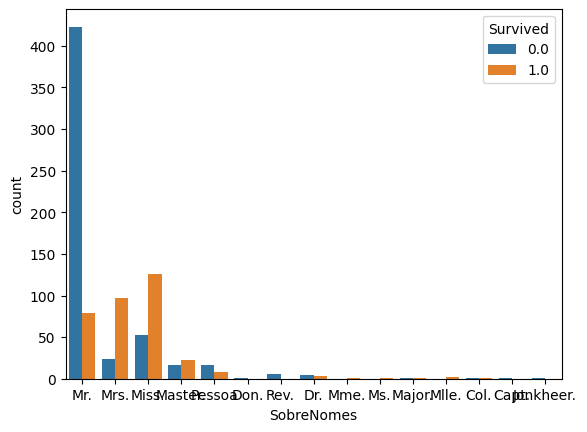

In [745]:
titanic_func(titanicDf , 'SobreNomes')

In [746]:
for i in titanicDf['SobreNomes'].unique():
    print(f"Das Pessoas com o titulo {i} , {titanicDf[titanicDf['SobreNomes'] == i]['Survived'].mean() :.0%} Sobreviveram" )

Das Pessoas com o titulo Mr. , 16% Sobreviveram
Das Pessoas com o titulo Mrs. , 80% Sobreviveram
Das Pessoas com o titulo Miss. , 70% Sobreviveram
Das Pessoas com o titulo Master. , 57% Sobreviveram
Das Pessoas com o titulo Pessoa , 32% Sobreviveram
Das Pessoas com o titulo Don. , 0% Sobreviveram
Das Pessoas com o titulo Rev. , 0% Sobreviveram
Das Pessoas com o titulo Dr. , 43% Sobreviveram
Das Pessoas com o titulo Mme. , 100% Sobreviveram
Das Pessoas com o titulo Ms. , 100% Sobreviveram
Das Pessoas com o titulo Major. , 50% Sobreviveram
Das Pessoas com o titulo Mlle. , 100% Sobreviveram
Das Pessoas com o titulo Col. , 50% Sobreviveram
Das Pessoas com o titulo Capt. , 0% Sobreviveram
Das Pessoas com o titulo Jonkheer. , 0% Sobreviveram


#### mostra que a maioria dos mr. morreram

### o que tem relaçao com o fato de muitos mais homem der morrido

Quantidade de valores únicos: 2

Quais são os valores únicos: [1 0]

Quantidade de valores nulos: 0

Quantidade por opção: 
Sex
1    843
0    466
Name: count, dtype: int64


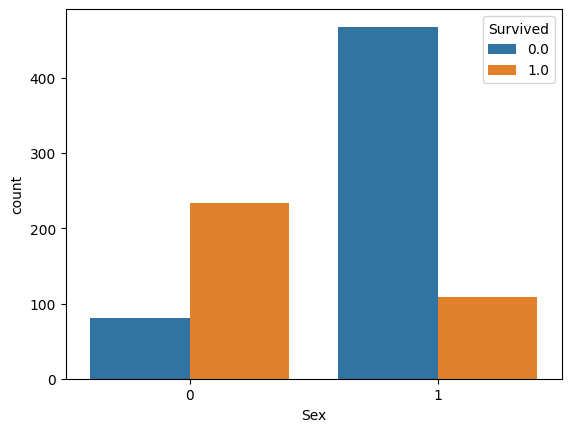

In [747]:
titanic_func(titanicDf, 'Sex')

In [748]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Pclass      1309 non-null   int64  
 2   Sex         1309 non-null   int64  
 3   Age         1309 non-null   float64
 4   SibSp       1309 non-null   int64  
 5   Parch       1309 non-null   int64  
 6   FamilySize  1309 non-null   int64  
 7   Fare        1309 non-null   float64
 8   Embarked    1309 non-null   object 
 9   SobreNomes  1309 non-null   object 
dtypes: float64(3), int64(5), object(2)
memory usage: 102.4+ KB


### deixar os dados de clasificaçao em type int

In [749]:
Pclass = pd.get_dummies(df['Pclass'], prefix='Pclass', drop_first=True)
SobreNomes = pd.get_dummies(df['SobreNomes'], prefix='SobreNomes', drop_first=True)
Embarked = pd.get_dummies(df['Embarked'], prefix='Embarked', drop_first=True)

SobreNomes = SobreNomes.astype(int)
Pclass = Pclass.astype(int)
Embarked = Embarked.astype(int)

In [750]:
titaniCompleto = pd.concat([df, Pclass , Embarked , SobreNomes], axis=1)

In [751]:
titaniCompleto.drop(['Pclass' , 'SobreNomes' , 'Embarked'], axis=1 , inplace=True)

In [752]:
titaniCompleto

,Survived,Sex,Age,SibSp,Parch,FamilySize,Fare,Pclass_2,Pclass_3,Embarked_Q,...,SobreNomes_Major.,SobreNomes_Master.,SobreNomes_Miss.,SobreNomes_Mlle.,SobreNomes_Mme.,SobreNomes_Mr.,SobreNomes_Mrs.,SobreNomes_Ms.,SobreNomes_Pessoa,SobreNomes_Rev.
0,0.0,1,22.0,1,0,2,7.2500,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,1.0,0,38.0,1,0,2,71.2833,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1.0,0,26.0,0,0,1,7.9250,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,1.0,0,35.0,1,0,2,53.1000,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.0,1,35.0,0,0,1,8.0500,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,1,37.0,0,0,1,8.0500,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1305,NaN,0,39.0,0,0,1,108.9000,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1306,NaN,1,38.5,0,0,1,7.2500,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1307,NaN,1,37.0,0,0,1,8.0500,0,1,0,...,0,0,0,0,0,1,0,0,0,0


### separar novamente entre treino e teste

In [753]:
Train = titaniCompleto[:bdIndex].copy()
Test = titaniCompleto[testeINdex:].copy()

In [754]:
Train.Survived = Train.Survived.astype(int)

#### isolar os dados

In [755]:
X = Train.drop('Survived' ,axis=1)

In [756]:
y = Train['Survived'] 

In [757]:
X_test = Test.drop('Survived' ,axis=1)

### funcao para ver a acuracia do treinamento da Machine Learning

In [758]:
def func_acuracia(algoritmo, X_train, y_train, vc):

    modelo = algoritmo.fit(X_train, y_train)
    acuracia = round(modelo.score(X_train, y_train) * 100, 2)
    train_pred = model_selection.cross_val_predict(algoritmo, X_train, y_train, cv=vc, n_jobs=-1)
    acuracia_vc = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return acuracia, acuracia_vc

#### passando em diversos modelos

In [759]:
accRf , accVcRf = func_acuracia(RandomForestClassifier() , X, y ,10 )

print(f'Acuracia: {accRf}')
print(f'Acuracia Validaçao Cruzada: {accVcRf}')

Acuracia: 98.43
Acuracia Validaçao Cruzada: 80.58


In [760]:
accLog , accVcLog = func_acuracia(LogisticRegression(max_iter=1000) , X, y ,10 )

print(f'Acuracia: {accLog}')
print(f'Acuracia Validaçao Cruzada: {accVcLog}')

Acuracia: 83.05
Acuracia Validaçao Cruzada: 82.6


In [761]:
accKnn , accVcKnn = func_acuracia(KNeighborsClassifier() , X, y ,10 )

print(f'Acuracia: {accKnn}')
print(f'Acuracia Validaçao Cruzada: {accVcKnn}')

Acuracia: 81.48
Acuracia Validaçao Cruzada: 70.37


In [762]:
accGuassian , accVcGuassian = func_acuracia(GaussianNB() , X, y ,10 )

print(f'Acuracia: {accGuassian}')
print(f'Acuracia Validaçao Cruzada: {accVcGuassian}')

Acuracia: 81.71
Acuracia Validaçao Cruzada: 80.47


In [763]:
accSvc , accVcSvc = func_acuracia(LinearSVC(dual=False) , X, y ,10 )

print(f'Acuracia: {accSvc}')
print(f'Acuracia Validaçao Cruzada: {accVcSvc}')

Acuracia: 83.39
Acuracia Validaçao Cruzada: 82.49


In [764]:
accSgd , accVcSgd = func_acuracia(SGDClassifier() , X, y ,10 )

print(f'Acuracia: {accSgd}')
print(f'Acuracia Validaçao Cruzada: {accVcSgd}')

Acuracia: 79.91
Acuracia Validaçao Cruzada: 65.54


In [765]:
accDt , accVcDt = func_acuracia(DecisionTreeClassifier() , X, y ,10 )

print(f'Acuracia: {accDt}')
print(f'Acuracia Validaçao Cruzada: {accVcDt}')

Acuracia: 98.43
Acuracia Validaçao Cruzada: 79.12


In [766]:
accGBt , accVcGBt = func_acuracia(GradientBoostingClassifier() , X, y ,10 )

print(f'Acuracia: {accGBt}')
print(f'Acuracia Validaçao Cruzada: {accVcGBt}')

Acuracia: 90.68
Acuracia Validaçao Cruzada: 83.61


In [767]:
accGuassian , accVcGuassian = func_acuracia(GaussianNB() , X, y ,10 )

print(f'Acuracia: {accGuassian}')
print(f'Acuracia Validaçao Cruzada: {accVcGuassian}')

Acuracia: 81.71
Acuracia Validaçao Cruzada: 80.47


#### com o modelo definido faz o treino dele

In [768]:
params = dict(     
    max_depth = [n for n in range(1, 5)],     
    min_samples_split = [n for n in range(2, 6)], 
    min_samples_leaf = [n for n in range(2, 6)],     
    n_estimators = [n for n in range(10, 50, 10)],
)

In [769]:
gbc = GradientBoostingClassifier()

In [770]:
gbcVc = GridSearchCV(estimator= gbc ,param_grid= params , cv = 10)

In [771]:
gbcVc.fit(X  , y)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [10, 20, 30, 40]})

In [772]:
print(f"Melhor pontuação: {gbcVc.best_score_}")
print(f"Melhores parâmetros: {gbcVc.best_estimator_}")

Melhor pontuação: 0.8429338327091138
Melhores parâmetros: GradientBoostingClassifier(max_depth=4, min_samples_leaf=4, min_samples_split=3,
                           n_estimators=30)


In [778]:
gradientBoostingClassifier_pred = gbcVc .predict(X_test)

### salvar na forma que o kaggle pediu

In [780]:
kaggle = pd.DataFrame({'PassengerId': idPassageiro, 'Survived': gradientBoostingClassifier_pred})
# save to csv
kaggle.to_csv('./titanic_gradient_boosting_pred.csv', index=False)

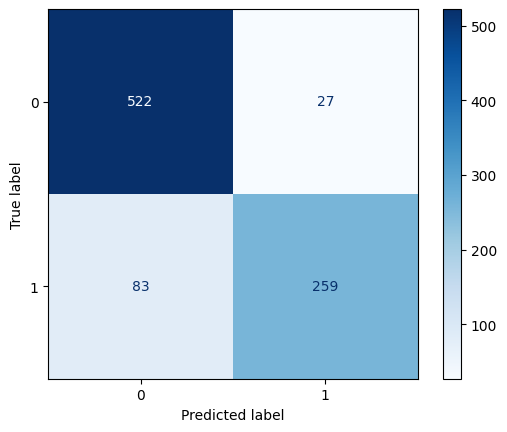

In [784]:
y_pred_train = gbcVc.predict(X)

matrix_confusao_train = confusion_matrix(y, y_pred_train)

disp = ConfusionMatrixDisplay(confusion_matrix=matrix_confusao_train)
disp.plot(cmap=plt.cm.Blues)
plt.show()
